Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
forest = pd.read_csv("forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

Boxplots of numeric independant features

Text(0.5, 1.0, 'area')

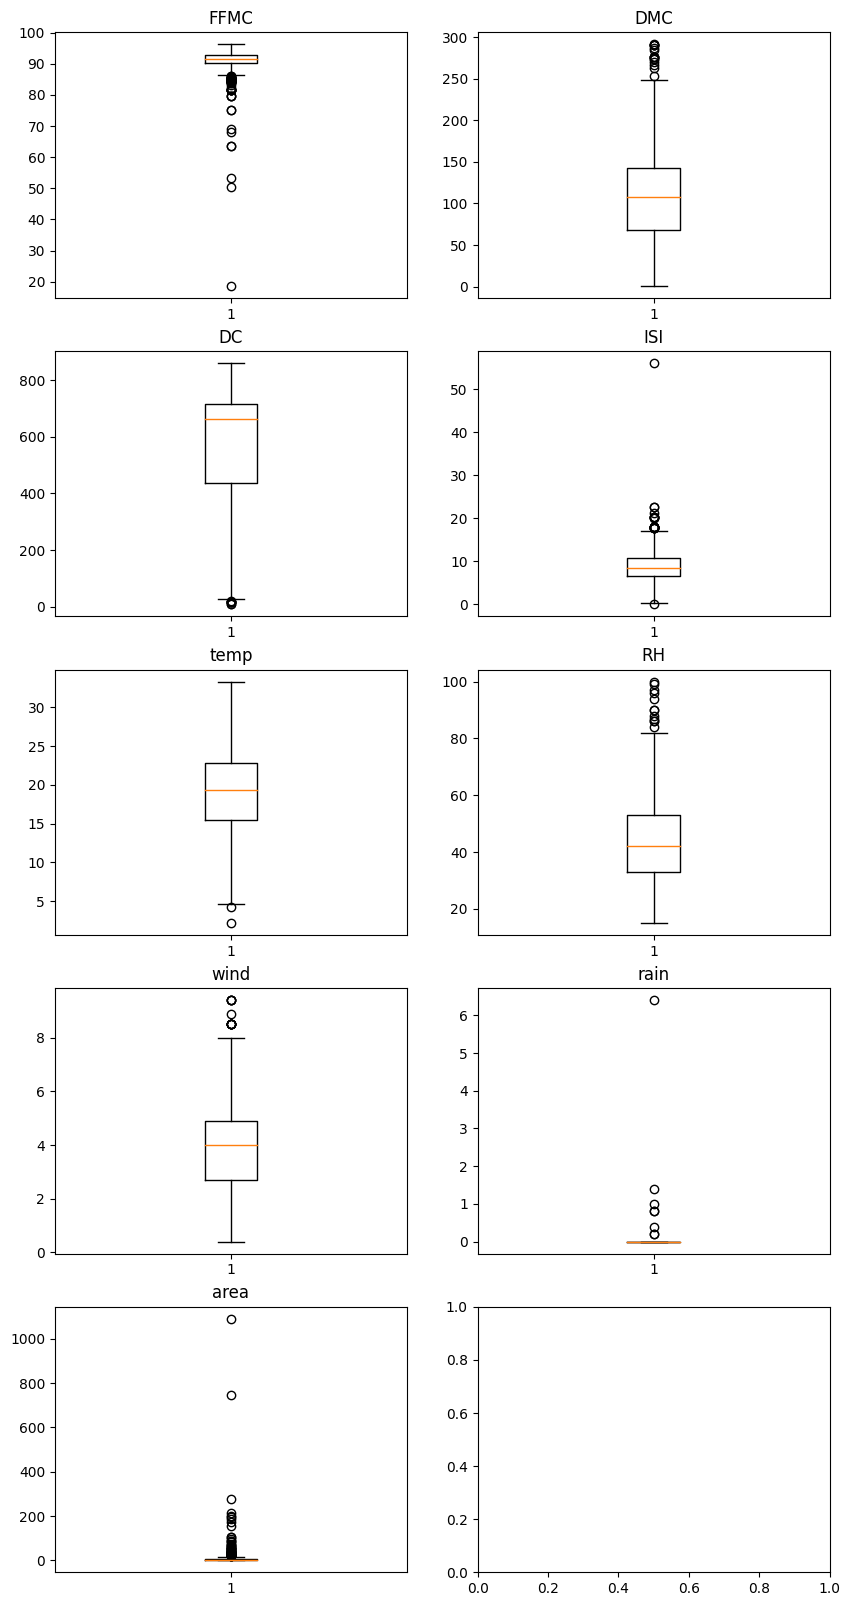

In [ ]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
axs[0,0].boxplot(forest.FFMC)
axs[0,1].boxplot(forest.DMC)
axs[1,0].boxplot(forest.DC)
axs[1,1].boxplot(forest.ISI)
axs[2,0].boxplot(forest.temp)
axs[2,1].boxplot(forest.RH)
axs[3,0].boxplot(forest.wind)
axs[3,1].boxplot(forest.rain)
axs[4,0].boxplot(forest.area)
axs[0,0].set_title("FFMC")
axs[0,1].set_title("DMC")
axs[1,0].set_title("DC")
axs[1,1].set_title("ISI")
axs[2,0].set_title("temp")
axs[2,1].set_title("RH")
axs[3,0].set_title("wind")
axs[3,1].set_title("rain")
axs[4,0].set_title("area")

Distributions of the numeric independant features

<Axes: xlabel='area', ylabel='Density'>

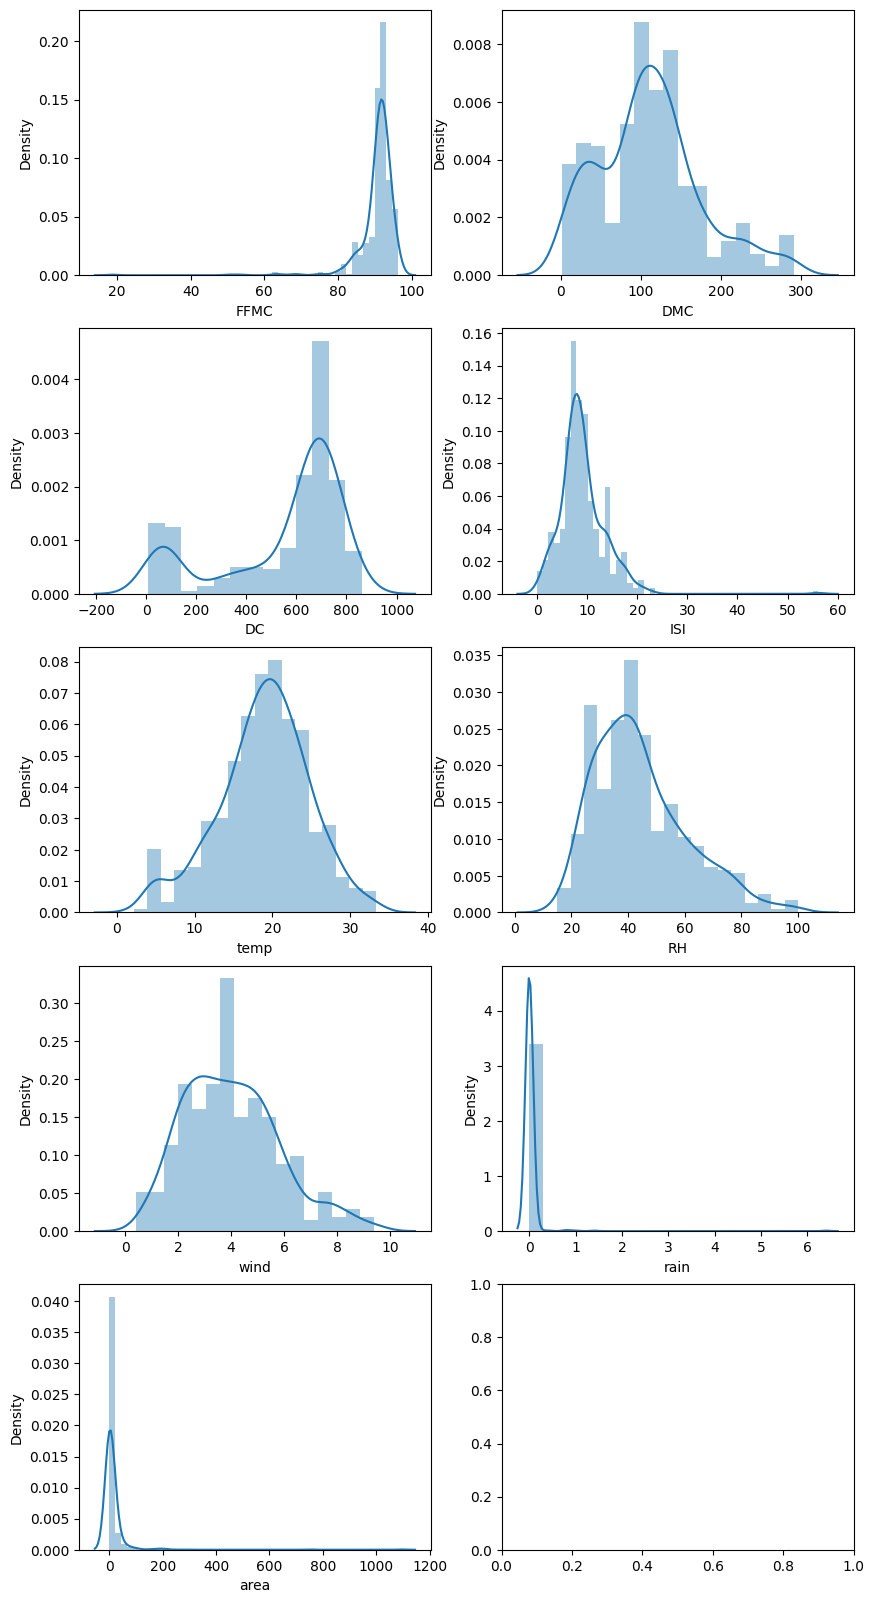

In [ ]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest.FFMC,ax=axs[0,0])
sns.distplot(forest.DMC,ax=axs[0,1])
sns.distplot(forest.DC,ax=axs[1,0])
sns.distplot(forest.ISI,ax=axs[1,1])
sns.distplot(forest.temp,ax=axs[2,0])
sns.distplot(forest.RH,ax=axs[2,1])
sns.distplot(forest.wind,ax=axs[3,0])
sns.distplot(forest.rain,ax=axs[3,1])
sns.distplot(forest.area,ax=axs[4,0])

Label encoding the size category column

In [ ]:
forest.loc[forest.size_category=='small','size_category']=0
forest.loc[forest.size_category=='large','size_category']=1

Dropping the month and the day column

In [ ]:
forest.drop(['month','day'],axis=1,inplace=True)

Splitting dependant and independant variables

In [ ]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [ ]:
y=y.astype('float')

Splitting train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Doing grid search to find the best hyperparameters

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 13, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9143393393393392)

Building model with the found parameters

In [ ]:
clf = SVC(C= 15, gamma = 0.0001)
clf.fit(x_train , y_train)
y_pred_train= clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 95.84487534626038
[[265   2]
 [ 13  81]]


In [ ]:
y_pred_test = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 87.17948717948718
[[107   4]
 [ 16  29]]


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       111
         1.0       0.88      0.64      0.74        45

    accuracy                           0.87       156
   macro avg       0.87      0.80      0.83       156
weighted avg       0.87      0.87      0.87       156

